In [1]:
from viz import *
import numpy as np

%matplotlib inline

from matplotlib import cm
import matplotlib.pyplot as plt
from trabonesim import TraBoneSim

### 1) set simulation parameters

In [5]:
inputdir = '../data/'
bonecube_id = 'P8'

field_strength_t = 3
b0dir = [0, 0, 1]
dchi_ppm = 2  # dchi = chi_bone - chi_marrow
te_s = np.linspace(start=0, stop=10e-3, num=30)
voxel_size_ct_mm = 45.6e-3
voxel_size_mr_mm = 1.5

binary_erosion = None
binary_erosion_se = None
fat_spec = True

# bone params
t2_bone_ms = 0.5

# marrow params
t2_marrow_ms = 60


### 2) simulate data for only bone, only marrow, and bone+marrow

In [6]:
rho_bone = 0.3
rho_marrow = 0

Tbone = TraBoneSim(
    bonecube_id=bonecube_id,
    inputdir=inputdir,
    field_strength_t=field_strength_t,
    b0dir=b0dir,
    dchi_ppm=dchi_ppm,
    te_s=te_s,
    t2_bone_ms=t2_bone_ms,
    t2_marrow_ms=t2_marrow_ms,
    binary_erosion=binary_erosion,
    binary_erosion_se=binary_erosion_se,
    fat_spec=fat_spec,
    rho_bone=rho_bone,
    rho_marrow=rho_marrow,
    voxel_size_ct_mm=voxel_size_ct_mm,
    voxel_size_mr_mm=voxel_size_mr_mm)

Tbone.set_bone_mask()
Tbone.simulate_rdf_ppm()
Tbone.simulate_signal()
Tbone.downsample_signal()


bonecube_id = P8
inputdir = ../data/
binary_erosion = None
binary_erosion_se = None

Load Data. Done.
Forward simulate RDF. Done.
Generate microscopic signal. Done.
Downsample to MR signal. Done.


In [11]:
rho_bone = 0
rho_marrow = 1

Tmarrow = TraBoneSim(
    bonecube_id=bonecube_id,
    inputdir=inputdir,
    field_strength_t=field_strength_t,
    b0dir=b0dir,
    dchi_ppm=dchi_ppm,
    te_s=te_s,
    t2_bone_ms=t2_bone_ms,
    t2_marrow_ms=t2_marrow_ms,
    binary_erosion=binary_erosion,
    binary_erosion_se=binary_erosion_se,
    fat_spec=fat_spec,
    rho_bone=rho_bone,
    rho_marrow=rho_marrow,
    voxel_size_ct_mm=voxel_size_ct_mm,
    voxel_size_mr_mm=voxel_size_mr_mm)

Tmarrow.set_bone_mask()
Tmarrow.simulate_rdf_ppm()
Tmarrow.simulate_signal()
Tmarrow.downsample_signal()


bonecube_id = P8
inputdir = ../data/
binary_erosion = None
binary_erosion_se = None

Load Data. Done.
Forward simulate RDF. Done.
Generate microscopic signal. Done.
Downsample to MR signal. Done.


In [10]:
rho_bone = 0.3
rho_marrow = 1

Tbone_and_marrow = TraBoneSim(
            bonecube_id=bonecube_id,
    inputdir=inputdir,
    field_strength_t=field_strength_t,
    b0dir=b0dir,
    dchi_ppm=dchi_ppm,
    te_s=te_s,
    t2_bone_ms=t2_bone_ms,
    t2_marrow_ms=t2_marrow_ms,
    binary_erosion=binary_erosion,
    binary_erosion_se=binary_erosion_se,
    fat_spec=fat_spec,
    rho_bone=rho_bone,
    rho_marrow=rho_marrow,
    voxel_size_ct_mm=voxel_size_ct_mm,
    voxel_size_mr_mm=voxel_size_mr_mm)

Tbone_and_marrow.set_bone_mask()
Tbone_and_marrow.simulate_rdf_ppm()
Tbone_and_marrow.simulate_signal()
Tbone_and_marrow.downsample_signal()


bonecube_id = P8
inputdir = ../data/
binary_erosion = None
binary_erosion_se = None

Load Data. Done.
Forward simulate RDF. Done.
Generate microscopic signal. Done.
Downsample to MR signal. Done.


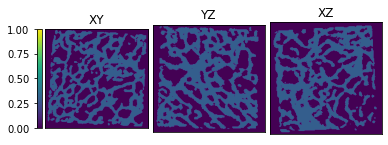

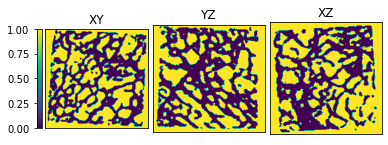

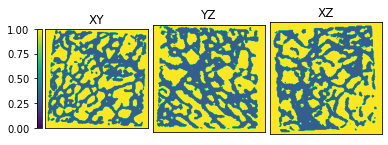

In [12]:
i_te = 0
f, ax = plot_orientations(np.abs(Tbone.smicro[:,:,:,i_te]), clim=[0, 1])
f.set_size_inches(5,2)
f, ax = plot_orientations(np.abs(Tmarrow.smicro[:,:,:,i_te]), clim=[0, 1])
f.set_size_inches(5,2)
f, ax = plot_orientations(np.abs(Tbone_and_marrow.smicro[:,:,:,i_te]), clim=[0, 1])
f.set_size_inches(5,2)

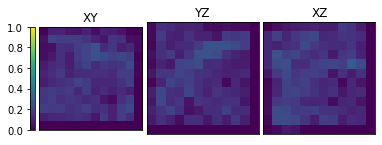

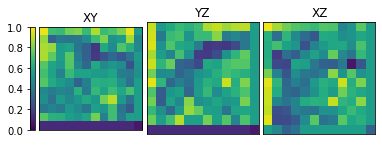

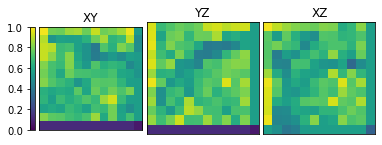

In [13]:
i_te = 0
f, ax = plot_orientations(np.abs(Tbone.smacro[:,:,:,i_te]), clim=[0, 1])
f.set_size_inches(5,2)
f, ax = plot_orientations(np.abs(Tmarrow.smacro[:,:,:,i_te]), clim=[0, 1])
f.set_size_inches(5,2)
f, ax = plot_orientations(np.abs(Tbone_and_marrow.smacro[:,:,:,i_te]), clim=[0, 1])
f.set_size_inches(5,2)

### 3) make Figures 2B and 2C

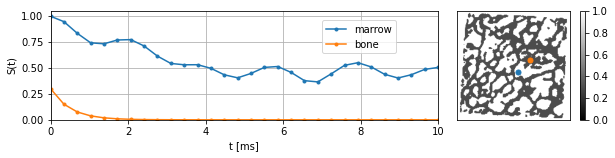

In [14]:
colors = cm.tab10([0,1,2,3,4])

px1 = 100
py1 = 100
px2 = 80
py2 = 120
z = 92
f, ax = plt.subplots(1, 2, figsize=(10, 2), gridspec_kw={'width_ratios': [2, 1]})

ax[0].plot(te_s*1000, np.abs(Tbone_and_marrow.smicro[px1, py1, z,:]),  '.-', color=colors[0], label='marrow')
ax[0].plot(te_s*1000, np.abs(Tbone_and_marrow.smicro[px2, py2, z,:]), '.-', color=colors[1], label='bone')
ax[0].set_ylabel('S(t)')
ax[0].set_xlabel('t [ms]')
ax[0].grid(True)
ax[0].legend(loc=(0.7, 0.61))
ax[0].set_ylim([0, 1.05])
ax[0].set_xlim([0, 10])

im = ax[1].imshow(np.abs(Tbone_and_marrow.smicro[:,:, z,0]), cmap='gray', clim=[0,1])
plt.colorbar(im, ax=ax[1])
ax[1].plot(py1, px1, 'o', color=colors[0], markersize=(5))
ax[1].plot(py2, px2, 'o', color=colors[1], markersize=(5))
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=-0.08, hspace=None)

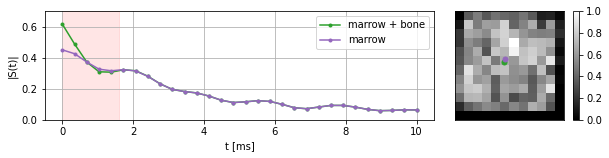

In [15]:
colors = cm.tab10([0, 1, 2, 3, 4, 5])

x = 5
y = 5
z = 5

f, ax = plt.subplots(1, 2, figsize=(10, 2), gridspec_kw={'width_ratios': [2, 1]})

im = ax[1].imshow(np.abs(Tbone.smacro[:,:, z, 0]) / np.max(np.abs(Tbone.smacro[:,:, z, 0])), cmap='gray', clim=[0,1])
plt.colorbar(im, ax=ax[1])

ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].plot(y-0.1, x+0.1, 'o', markersize=5, color=colors[2])
ax[1].plot(y, x-0.2, 'o', markersize=5, color=colors[4])

t_ms = te_s * 1000

ax[0].plot(t_ms, np.abs(Tbone_and_marrow.smacro[x,y,z,:]), '.-', c=colors[2], label='marrow + bone')
ax[0].plot(t_ms, np.abs(Tmarrow.smacro[x,y,z,:]), '.-', c=colors[4], label='marrow')

ax[0].set_ylabel('|S(t)|')
ax[0].legend(fontsize=10 )
ax[0].axvspan(0., 1.6, color='red', alpha=0.1)
ax[0].grid()
ax[0].set_xlabel('t [ms]')
ax[0].set_ylim([0, 0.7])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=-0.09, hspace=None)